<a href="https://colab.research.google.com/github/katherymbr/Dim_fractalMontecarlo_Sierpinskipinsk/blob/main/M2_Metodologia%2BDim_fractal%2BMIAS_271.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODOLOGIA PARA SEGMENTACION AUTOMÁTICA DE MICROCALCIFICACIONES Y CALCULO DE LA DIMENSION FRACTAL- MIAS mdb271

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*    *Microcalcificaciones*







Las microcalcificaciones son depósitos de oxalato cálcico y fosfato cálcico en el tejido mamario que aparecen como manchas blancas en una mamografía. Los mecanismos por los que se producen las microcalcificaciones no se conocen con claridad, aunque se sospecha que intervienen muchos factores, como la edad, los desequilibrios hormonales, el embarazo, la lactancia y los cambios en la dieta (https://www.nature.com/articles/s41598-019-51186-w)

Los depósitos de calcificación se encuentran en el sistema ductal, los acinos mamarios, el estroma y los vasos. Las microcalcificaciones están presentes en aproximadamente el 55% de las neoplasias mamarias no palpables y son responsables de la detección del 85-95% de los casos de carcinoma ductal in situ (CDIS) mediante mamografía , y también pueden estar presentes en cánceres invasivos. El papel de las microcalcificaciones en la detección del cáncer de mama ha sido ampliamente estudiado y algunos grupos de investigación incluso han investigado el papel de las microcalcificaciones en términos de riesgo y progresión del cáncer de mama.

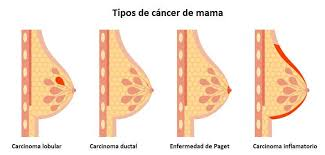

*  Desafios de la segmentación de microcalcificaciones en mamografias:

1.  Tamaño reducido: Las microcalcificaciones generalmente tienen un tamaño que oscila entre Menos de 0.1 mm hasta aproximadamente 1 milímetro de diámetro. Este rango de tamaño puede variar dependiendo de la densidad y composición del tejido mamario.

2. Forma: Pueden ser puntiformes(tiene forma de punto), en forma de líneas o tener una apariencia granular.

3. Distribución: Pueden aparecer solas o en grupos, y la forma en que están distribuidas puede proporcionar pistas importantes sobre su naturaleza benigna o maligna.

4. Superposición de tejidos: Pueden confundirse con tejido cirdundante

*  INFORMACIÓN A TENER EN CUENTA RESPECTO A DISTRIBUCIÓN DE MICROCALCIFICACIONES

Importancia Clínica:

La forma y distribución de las microcalcificaciones puntiformes son importantes para el diagnóstico médico. Las calcificaciones que están dispersas uniformemente suelen ser benignas, mientras que las agrupadas o con patrones específicos pueden ser indicativas de una condición más seria, como el cáncer de mama

*     *Hipotesis*

La población de pixeles en la region de microcalcificacion tiene una distribución donde la media tiene una dimensión fractal más alta que la población de pixeles fuera de la microcalcificación (la población de pixeles que esta en las microcalcificaciones tiene una dimnesión fractal que esta por encima de la dimensión fractal de la media). En terminos de frecuencia, en los puntos donde hay microcalcificaciones hay alta frecuencia.

*     *Dataset*

Base de datos mini-MIAS de mamografías (http://peipa.essex.ac.uk/info/mias.html) .La base de datos mini-MIAS consiste en una colección normalizada de 322 imágenes de mamografías (en blanco y negro), 161 derechas y 161 de izquierda de 1024 × 1024 píxeles.


**1ra columna:**
Número de referencia de la base de datos MIAS.

**2da columna:**
Carácter del tejido de fondo:
  F Graso
  G Graso-glandular
  D densa-glandular

**3ra columna:**
Clase de anormalidad presente:
  CALC Calcificación
  CIRC Masas bien definidas/circunscritas
  SPIC Masas espiculadas
  MISC Otras masas mal definidas
  ARCO Distorsión arquitectónica
  Asimetría ASYM
  NORMA Normal

**4ta columna:**
Gravedad de la anormalidad;
  B Benigno
  M maligno
  
**5ª, 6ª columnas:**
coordenadas de imagen x,y del centro de la anormalidad.
7ma columna:
Radio aproximado (en píxeles) de un círculo que encierra la anomalía.

# FUNCIONES

In [ ]:
pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.0 MB/s eta 0:00:00


In [ ]:
import imageio as io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from skimage import data
from skimage.filters import threshold_multiotsu
import matplotlib
from pydicom import dcmread
from scipy.stats import linregress
import math
import random
from skimage import io, color, filters, data, exposure

In [ ]:
# LEER IMAGEN
def leer_imagen(rute):
  imagen= io.imread(rute)
  return(imagen)

ruta='/content/drive/MyDrive/'

In [ ]:
# TAMAÑO DE LA IMAGEN Y EL PIXEL MÁXIMO Y MÍNIMO

def tamaño_imagen(imagen):
    print('dimensiones de la imagen', imagen.shape)
    print ('valor MINIMO del pixel:',imagen.min())
    print('valor MÁXIMO del pixel:', imagen.max())

In [ ]:
# GRAFICAR UNA IMAGEN CON TÍTULO

def graficar_imagen(imagen, titulo, tamaño=100):
    fig, ax = plt.subplots(dpi=tamaño)
    ax.imshow(imagen,cmap='gray')
    plt.title(str(titulo))
    plt.show

In [ ]:
# GRAFICAR 2 IMAGENES HORIZONTALES CON TÍTULO

import matplotlib.pyplot as plt

def graficar_dosimagenes_horizontaltitulo(imagen_oscura, imagen_brillante, titulo1, titulo2, tamaño=100):
    fig, ax = plt.subplots(1, 2, dpi=tamaño)

    # Primer subgráfico
    ax[0].imshow(imagen_oscura, cmap='gray')
    ax[0].set_axis_off()
    ax[0].set_title(str(titulo1))  # Utilizar set_title para establecer el título

    # Segundo subgráfico
    ax[1].imshow(imagen_brillante, cmap='gray')
    ax[1].set_axis_off()
    ax[1].set_title(str(titulo2))  # Utilizar set_title para establecer el título

    plt.show()


In [ ]:
#  GRAFICAR 3 IMAGENES HORIZONTAL + TÍTULO

def graficar_tresimagenes_horizontaltitulo(imagen_oscura, imagen_brillante, imagen1, titulo1, titulo2, titulo3, tamaño=400):
    fig, ax = plt.subplots(1,3, dpi=tamaño)
    ax[0].imshow(imagen_oscura, cmap='gray')
    ax[0].set_axis_off()
    ax[0].set_title(str(titulo1), fontsize=5)
    #plt.title(str(titulo1))
    ax[1].imshow(imagen_brillante, cmap='gray')
    ax[1].set_axis_off()
    ax[1].set_title(str(titulo2), fontsize=5)
    #plt.title(str(titulo2))
    ax[2].imshow(imagen1, cmap='gray')
    ax[2].set_axis_off()
    ax[2].set_title(str(titulo3), fontsize=5)
    plt.show()

In [ ]:
#  GRAFICAR 4 IMAGENES HORIZONTAL + TÍTULO

def graficar_cuatroimagenes_horizontaltitulo(imagen1,imagen2,imagen3,imagen4,titulo1,titulo2,titulo3,titulo4):

    # create figure
    fig = plt.figure(figsize=(24, 26))
    # setting values to rows and column variables
    rows = 1
    columns = 4
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    # showing image
    plt.imshow(imagen1, cmap="gray")
    plt.axis('off')
    plt.title(str(titulo1))
    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)
    # showing image
    plt.imshow(imagen2, cmap="gray")
    plt.axis('off')
    plt.title(str(titulo2))
    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)
    # showing image
    plt.imshow(imagen3, cmap="gray")
    plt.axis('off')
    plt.title(str(titulo3))
    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 4)
    # showing image
    plt.imshow(imagen4, cmap="gray")
    plt.axis('off')
    plt.title(str(titulo4))

In [ ]:
# FUNCIÓN PARA CONSTRUIR LAS FRECUENCIAS DE UN HSITOGRAMA DE LUMINANCIAS

def frecuencias(y1, bins):

    intervalo=np.linspace(0,255, bins+1)
    frecuencia=np.zeros(bins)
    print('frecuencia')
    for i in range(bins):
        #print(intervalo[i], intervalo[i+1])
        frecuencia[i]=((y1>=intervalo[i]) * (y1<intervalo[i+1])). sum()
        #print('frecuencia es', frecuencia[i])
        #print(intervalo[i+1])
    frecuencia[bins-1] += (y1==1).sum()
    return(frecuencia,intervalo)

In [ ]:
#funcion para recortar imagenes de Mias

def area_afectada(img5, x,y,r):

    img5_copy=np.copy(img5)
    #cv2.line(imagen264_v2,(x1,y1),(x2,y2),(255,0,0),4)
    cv2.line(img5_copy,(x-r,y-r),(x+r,y-r),(255,0,0),4)
    cv2.line(img5_copy,(x-r,y+r),(x+r,y+r),(255,0,0),4)
    cv2.line(img5_copy,(x-r,y-r),(x-r,y+r),(255,0,0),4)
    cv2.line(img5_copy,(x+r,y-r),(x+r,y+r),(255,0,0),4)
    return(img5_copy)

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar 10 imágenes con sus títulos
def graficar_diezimagenes_horizontaltitulo(img1, img2, img3, img4, img5, img6, img7, img8, img9, img10,
                                           t1, t2, t3, t4, t5, t6, t7, t8, t9, t10):
    # Crear figura con DPI especificado
    fig, axes = plt.subplots(2, 5, figsize=(18, 6), dpi=200)
    fig.subplots_adjust(hspace=0.1, wspace=0)  # Ajustar el espacio entre subplots

    # Lista de imágenes y títulos
    imgs = [img1, img2, img3, img4, img5, img6, img7, img8, img9, img10]
    titles = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10]

    # Iterar sobre las imágenes y títulos para graficar
    for i, (img, title) in enumerate(zip(imgs, titles)):
        ax = axes[i // 5, i % 5]  # Seleccionar el subplot correspondiente
        ax.imshow(img, cmap="gray")
        ax.axis('off')
        ax.set_title(str(title), fontsize=10)  # Ajustar tamaño de título

    # Mostrar la figura
    plt.show()

# Ejemplo de uso
# img1, img2, ... , img10 son tus imágenes
# t1, t2, ... , t10 son tus títulos
# graficar_diezimagenes_horizontaltitulo(img1, img2, img3, img4, img5, img6, img7, img8, img9, img10,
#                                        "Título 1", "Título 2", "Título 3", "Título 4", "Título 5",
#                                        "Título 6", "Título 7", "Título 8", "Título 9", "Título 10")



# funciones de pre_procesamiento

In [ ]:
#PASAR LA  IMAGEN AL ESPACIO Y EN GRIS


import numpy as np

def rgb_a_y(matriz_rgb):
    #La función rgb_a_y toma la matriz matriz_rgb que contiene los valores RGB de cada píxel de la imagen
    matriz_rgb = np.array(matriz_rgb) #la matriz RGB se convierte en un arreglo de NumPy utilizando np.array para permitir operaciones vectorizadas.
    coeficientes = np.array([0.299, 0.587, 0.114]) #se define un arreglo coeficientes que contiene los coeficientes de conversión de RGB a Y.
    matriz_y = np.dot(matriz_rgb, coeficientes) #La matriz RGB se multiplica con los coeficientes utilizando np.dot para calcular la suma ponderada de los canales de color. Esto genera una matriz de luminancia matriz_y
    return matriz_y



In [ ]:
# FUNCION _TRANSFORMACIÓN LOGARÍTMICA

def transf_log(img):
  img_log= (255/np.log(256))*np.log(img+1.1)

  return(img_log)

In [ ]:
# FUNCIÓN DE TRANSFORMACIÓN DE ANSCOMBE

def anscombe(img):
  img_anscombe= 2.0*np.sqrt(img + 3.0/8.0)
  print("Ajustar el rango según el tamaño del pixel max y min de la imágen!!!:")
  tamaño_imagen(img_anscombe)

  return(img_anscombe)


In [ ]:
# UMBRALIZACIÓN DE OTSU

import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_multiotsu

def triple_umbral_otsu(img_log):
    # Setting the font size for all plots.
    plt.rcParams['font.size'] = 9

    # The input image.
    image = img_log

    # Applying multi-Otsu threshold for the default value, generating
    # three classes.
    thresholds = threshold_multiotsu(image)

    # Using the threshold values, we generate the three regions.
    regions = np.digitize(image, bins=thresholds)

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

    # Plotting the original image.
    ax[0].imshow(image, cmap='gray',clim=(0, 1))
    ax[0].set_title('Imagen')
    ax[0].axis('off')

    # Plotting the histogram and the two thresholds obtained from
    # multi-Otsu.
    ax[1].hist(image.ravel(), bins=255)
    ax[1].set_title('Histograma')
    for thresh in thresholds:
        ax[1].axvline(thresh, color='r')

    # Plotting the Multi Otsu result.
    ax[2].imshow(regions, cmap='jet')
    ax[2].set_title('Multi-Otsu ')
    ax[2].axis('off')

    plt.subplots_adjust()

    print("El triple umbral de OTSU es (Nota: empieza en 0 - hasta 1) =", thresholds)
    print("El triple umbral de OTSU se visualiza con la paleta JET (0=azul, 1=verde, 2=rojo)")

    plt.show()

    return regions, thresholds


In [ ]:
# FUNCIÓN FILTRO DE APERTURA

def filto_apertura(img):
  img_otsu_apertura=img.astype(np.uint8)
  # defino el kernel y su tamaño
  kernel1 = np.ones((2,2),np.uint8)
  #aplico el filtro de apertura y defino las veces que voy a aplicar este filtro (iteraciones)
  opening = cv2.morphologyEx(img_otsu_apertura, cv2.MORPH_OPEN, kernel1)

  return(opening)

In [ ]:
# FUNCION DE INTENSIDAD MENDIANTE FUNCIÓN COSENO

def funcion_intesidad_coseno(img):
  img_coseno= 1-np.cos((np.pi/2)*(img/255.0))
  #vmin = 0.0162 # Valor mínimo deseado
 # vmax = 0.0193 # Valor máximo deseado
  print("Ajustar el rango según el tamaño del pixel max y min de la imágen!!!:")
  tamaño_imagen(img_coseno)
  #print("el valor minimo del ranjo ajustado vmax es:", vmax)

  return(img_coseno)


In [ ]:
# FUNCIÓN FILTRO DOG (DIFERENCIA DE GAUSS)

import cv2

# FUNCIÓN FILTRO DOG (DIFERENCIA DE GAUSS)
def filtro_dog(img, k1, k2):
    dog_low = cv2.GaussianBlur(img, (3, 3), 0)
    dog_high = cv2.GaussianBlur(img, (5, 5), 0)
    dog = k1 * dog_low - k2 * dog_high
    return dog

In [ ]:
# FUNCIÓN PARA CONSTRUIR LAS FRECUENCIAS DE UN HSITOGRAMA DE LUMINANCIAS

def frecuencias(y1, bins):

    intervalo=np.linspace(0,255, bins+1)
    frecuencia=np.zeros(bins)
    print('frecuencia')
    for i in range(bins):
        #print(intervalo[i], intervalo[i+1])
        frecuencia[i]=((y1>=intervalo[i]) * (y1<intervalo[i+1])). sum()
        #print('frecuencia es', frecuencia[i])
        #print(intervalo[i+1])
    frecuencia[bins-1] += (y1==1).sum()
    return(frecuencia,intervalo)

In [ ]:
# Función para hacer un histograma.

# la función tuene como parametros de entrada: imagen, nro de bins y el titulo. No tiene retorno porque solo es de visualización

def dibujar_histograma(img, n_bins, title=''):
    h = img.ravel()
    _, nbins = np.histogram(h, bins=n_bins, range=[0, 1])

    plt.hist(h, bins=nbins, edgecolor='black')
    plt.title(format(title))
    #plt.grid()
    plt.show()

In [ ]:
# *********************
import cv2

def area_afectada_cuatro_fito(img5, x1, y1, x2, y2, x3, y3, x4, y4):
    img5_copy = np.copy(img5)

    # Color en formato RGB (255, 87, 51) que corresponde a #FF5733
    color = (255, 87, 51)

    # Dibuja las líneas del rectángulo en el color especificado
    cv2.line(img5_copy, (x1, y1), (x2, y2), color, 5)
    cv2.line(img5_copy, (x2, y2), (x3, y3), color, 5)
    cv2.line(img5_copy, (x3, y3), (x4, y4), color, 5)
    cv2.line(img5_copy, (x4, y4), (x1, y1), color, 5)

    return img5_copy

In [ ]:
# funcion para CORTAR UNA IMAGEN mamaria en la imagen fito

def imagen_recorte_fito(imagen,y1,y4,x1,x2):
    imagen_recorte= imagen[y1:y4 , x1:x2]
    #graficar_imagen(imagen_recorte , 'imagen recortada', tamaño=90)
    return(imagen_recorte)

In [ ]:
# FUNCIÓN ARA HACER 2 HISTOGRAMAS

def hyper_histogram(hyp1, hyp2, n_bins, title1='', title2=''):

    h1 = hyp1[:,:].ravel()
    h2 = hyp2[:,:].ravel()
    _, nbins = np.histogram(h1, bins=n_bins, range=[0, 1])

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].hist(h1, bins=nbins, edgecolor='black')
    axs[0].set_title(format(title1))
    plt.grid()
    axs[1].hist(h2, bins=nbins, edgecolor='black')
    axs[1].set_title(format(title2))
    plt.grid()
    plt.show()

FUNCIONES PARA MIAS

In [ ]:
#funcion para dibujar area afectada de Mias
# En esta función el origen de cordenadas está en la esquina inferior izquierda

def dibujar_area_afectada_mias(img, x, y, r):

    # Origen de la imagen en (x=0, y=maximo_y)
    y = img.shape[0] - y
    img_copy = np.copy(img)
    cv2.line(img_copy,(x-r,y-r),(x+r,y-r),(255,0,0),4)
    cv2.line(img_copy,(x-r,y+r),(x+r,y+r),(255,0,0),4)
    cv2.line(img_copy,(x-r,y-r),(x-r,y+r),(255,0,0),4)
    cv2.line(img_copy,(x+r,y-r),(x+r,y+r),(255,0,0),4)
    return img_copy

In [ ]:
#funcion para recortar imagenes de Mias
# En esta función el origen de cordenadas está en la esquina inferior izquierda

def recorte_area_afectada_mias(img, x, y, r):
  img_copy = np.copy(img)
  y = img.shape[0] - y
  img_recorte = img_copy[y-r:y+r, x-r:x+r]
  return img_recorte

# FUNCIONES PARA MONTECARLO Y DIM FRACTAL

In [ ]:
# FUNCIÓN PARA CALCULAR EL UMBRAL DE OTSU
from skimage import io, color, filters, data, exposure

def Otsu(imagen):

  umbral_otsu= filters.threshold_otsu(imagen)
  # Calcular el histograma de la imagen
  hist, bins_center = exposure.histogram(imagen)

  # Graficar el histograma
  plt.figure(figsize=(10, 5))
  plt.subplot(121)
  plt.bar(bins_center, hist, width=0.5, color='gray')
  plt.title('Histograma de la imagen')
  plt.xlabel('Intensidad de píxel')
  plt.ylabel('Frecuencia')

  # Graficar el umbral de Otsu
  plt.axvline(umbral_otsu, color='r', linestyle='--', linewidth=2, label='Umbral de Otsu')
  plt.legend()

  # Mostrar la imagen original y aplicar el umbral de Otsu
  plt.subplot(122)
  plt.imshow(imagen, cmap='gray')
  plt.title('Imagen con umbral de Otsu')
  plt.axhline(umbral_otsu, color='r',linestyle='--', linewidth=0.01)
  plt.axis('off')
  plt.show()

  return umbral_otsu

In [ ]:
# FUNCIÓN PARA BINARIZAR UNA IMAGÉN

def binarizacion(img_norm, umbral):

  im_binary1 = np.copy(img_norm)

  mask_1 = im_binary1 >=  umbral  # umbral_otsu
  mask_2 = im_binary1 <  umbral   # umbral_otsu

  im_binary1[mask_1] = 1 # pixeles mayores, igualeses a umbral_otsu: toman tomar el valor de 1
  im_binary1[mask_2] = 0 # pixeles menores a umbral_otsu: toman tomar el valor de 0

  print(im_binary1.shape)
  print("pixel minimo:",im_binary1.max())
  print("pixel máximo:",im_binary1.min())

  return im_binary1


In [ ]:
# FUNCIÓN QUE GENERA EL VIEWPORT CUADRADO A PARTIR DE UNA IMAGEN DE ENTRADA Y UN FACTOR BETA

def viewport_cuadrado(img, beta):
    "beta es el Factor de incremento del viewport con respecto a las dimensiones de la imagen"
    # Definición del área del viewport
    viewport_y, viewport_x = img.shape
    print("--------------------------------------")
    print("Dimensiones de la imagen de entrada a la función - viewport cuadrado-:", img.shape)
    # Ajustar las dimensiones para que el viewport sea cuadrado
    max_dimension = max(viewport_y, viewport_x)
    print("--------------------------------------")
    print("Se tomará el lado mas grande de la imagen de entrada, para formar el cuadrado:", max_dimension)
    # Ajustar las dimensiones dado el factor beta
    max_dimension = int(max_dimension * beta)
    print("--------------------------------------")
    print("El factor de incremento de la iamgen sera un factor Beta: ", beta)
    # Crear un viewport cuadrado
    viewport = np.zeros((max_dimension,  max_dimension))
    print("--------------------------------------")
    print("Dimensiones del viewport: {}".format(viewport.shape))
    print("--------------------------------------")
    return  viewport

# FUNCIÓN PARA DIBUJAR UN CIRCULO ENCIMA DE CUALQUIER IMAGEN DE ENTRADA "cuadrada". Donde el radio del circulo es la mitad del larfo de la imagen

def generar_circulo(img):
    # Obtiene las dimensiones de la imagen
    alto_y, ancho_x = img.shape[:2]
    # Calcula el centro de la imagen
    centro_x = ancho_x / 2
    centro_y = alto_y / 2
    print("++++++++++++++++++++++++++++++++++++++")
    print("El radio del circulo dibujado es:", centro_x)
    print("++++++++++++++++++++++++++++++++++++++")
    # genera el círculo dado el centro
    circulo = plt.Circle((centro_x, centro_y), ancho_x / 2, color='blue', fill=False)
    return circulo

# Función para verificar si un punto cumple con la condición de MONTECARLO
def verificar_condicion(x, y, ancho_x):
    return x ** 2 + y ** 2 <= (ancho_x / 2) ** 2

# FUNCION PARA GENERAR PUNTOS MONTECARLO
def generar_puntos_montecarlo(img, num_puntos):
    print("El total de puntos aleatorios a evaluar es: ", num_puntos)
    print(".....................................")
    puntos_cumplen_condicion = []
    alto_y, ancho_x = img.shape[:2]
    # Definir el número de puntos a generar
    for i in range(num_puntos):
        # Generar coordenadas (x, y) dentro del rango especificado
        x = random.uniform(0, ancho_x)
        y = random.uniform(0, alto_y)

        # Verificar si el punto cumple con la condición
        if verificar_condicion(x - ancho_x / 2, y - alto_y / 2, ancho_x):
            puntos_cumplen_condicion.append((x, y))
    print("los puntos que cumplen la condición de montecarlo sin importar la frontera:",puntos_cumplen_condicion)
    return puntos_cumplen_condicion

#FUNCIÓN PARA VERIFICAR SI LOS 4 PUNTOS DE LA IMAGEN QUE SE INDEXA CUMPLE CON LA CONDICION DE MONTECARLO
# Y NO SE SALEN DEL CIRCULO

def verificar_im_en_circulo(x, y, im, viewport):

    l_view = viewport.shape[0]
    y_im, x_im = im.shape
    x_real = x - l_view/2
    y_real = y - l_view/2
    x_val = None
    y_val = None

    # Verificar que la imagen no se sale del rango del circulo en ninguno de los cuadrantes
    if (verificar_condicion(y_real,        x_real,        l_view) and
        verificar_condicion(y_real + y_im, x_real,        l_view) and
        verificar_condicion(y_real + y_im, x_real + x_im, l_view) and
        verificar_condicion(y_real,        x_real + x_im, l_view)):
      x_val, y_val = x, y
    return x_val, y_val

In [ ]:
# **************************** Box counting ***********************************************

# Invoco la función: def box_counting2(img, viewport, x_val, y_val)
# viewport debe ser cuadrado

def box_counting2(img, viewport, x_val, y_val):

    y_im, x_im = img.shape
    viewport[y_val:y_val+y_im, x_val:x_val+x_im] = img

    viewport_y, viewport_x = viewport.shape

    # Obtengo la dimensión mínima del viewport (ahora cuadrado)
    min_axes = min(viewport.shape)

    # Obtener la mayor potencia de 2 que sea menor al valor de min_axes
    nbase = 2 ** np.floor(np.log(min_axes) / np.log(2))

    # Se obtiene el exponente
    n = int(np.log(nbase) / np.log(2))

    #se obtiene el tamaño de los boxes
    # Se obtienen los boxes (media) en base 2^n  hasta 2^1
    boxes = 2 ** np.arange(1, n + 1, 1)[::-1]


    # Contar los pixeles en cada box para cada partición 2^n
    # Considerando el tamaño de los boxes se cuentan los pixeles que hay en cada box, para cada partición 2^n
    counts = []
    for box in boxes:
        bc = np.add.reduceat(
            np.add.reduceat(viewport, np.arange(0, viewport_y, box), axis=0),
            np.arange(0, viewport_x, box), axis=1)
        # Se cuentan el número de box cuya suma de pixels sea mayor a 0 y menor box^2
        counts.append(len(np.where((bc > 0) & (bc < box ** 2))[0]))

    log_inv_boxes_X = np.log(1 / boxes)
    log_counts_y = np.log(counts)
    #print(log_counts_y )


    return log_inv_boxes_X[::-1], log_counts_y[::-1]

# EJECUCIÓN




*     *1. Preprocesamiento*

Para el pre-procesamiento de la imagen se realizarán los pasos desarrollados a continuación:

In [ ]:
# INFORMACIÓN DEL DATASET 'MIAS'

mg_df =pd.read_table('/content/drive/MyDrive/Info.txt', sep=" " )
print('Dataset MIAS')
print('nro, img_MIAS, tejido, anormalidad, gravedad, x, y, c')
print(mg_df)
mg_df.head(100)

Dataset MIAS
nro, img_MIAS, tejido, anormalidad, gravedad, x, y, c
     NO_IMG  T  ANOR    G  XXX  YYY    CCC
0    mdb001  G  CIRC    B  535  425  197.0
1    mdb002  G  CIRC    B  522  280   69.0
2    mdb003  D  NORM  NaN  NaN  NaN    NaN
3    mdb004  D  NORM  NaN  NaN  NaN    NaN
4    mdb005  F  CIRC    B  477  133   30.0
..      ... ..   ...  ...  ...  ...    ...
325  mdb318  D  NORM  NaN  NaN  NaN    NaN
326  mdb319  D  NORM  NaN  NaN  NaN    NaN
327  mdb320  D  NORM  NaN  NaN  NaN    NaN
328  mdb321  D  NORM  NaN  NaN  NaN    NaN
329  mdb322  D  NORM  NaN  NaN  NaN    NaN

[330 rows x 7 columns]


,NO_IMG,T,ANOR,G,XXX,YYY,CCC
0,mdb001,G,CIRC,B,535,425,197.0
1,mdb002,G,CIRC,B,522,280,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477,133,30.0
...,...,...,...,...,...,...,...
95,mdb095,F,ASYM,M,466,517,29.0
96,mdb096,F,NORM,NaN,NaN,NaN,NaN
97,mdb097,F,ASYM,B,612,297,34.0
98,mdb098,F,NORM,NaN,NaN,NaN,NaN


In [ ]:
# FILTRO IMAGENES CON ANOMALIAS (ANOR), MICROCALCIFICCAIONES (CALC) MALIGNAS (M)

df_calc = mg_df[mg_df['ANOR'] == 'CALC'] #30 con calcificaciones
df_calc = mg_df[mg_df['G']== 'M']
df_calc.head(100)


,NO_IMG,T,ANOR,G,XXX,YYY,CCC
23,mdb023,G,CIRC,M,538,681,29.0
28,mdb028,F,CIRC,M,338,314,56.0
58,mdb058,D,MISC,M,318,359,27.0
72,mdb072,G,ASYM,M,266,517,28.0
75,mdb075,F,ASYM,M,468,717,23.0
90,mdb090,G,ASYM,M,510,547,49.0
92,mdb092,F,ASYM,M,423,662,43.0
95,mdb095,F,ASYM,M,466,517,29.0
102,mdb102,D,ASYM,M,415,460,38.0
105,mdb105,D,ASYM,M,516,279,98.0


# **Mamografias**

# **PASO 1. LEO: Imagen mamografia original - MIAS 271**

dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 234


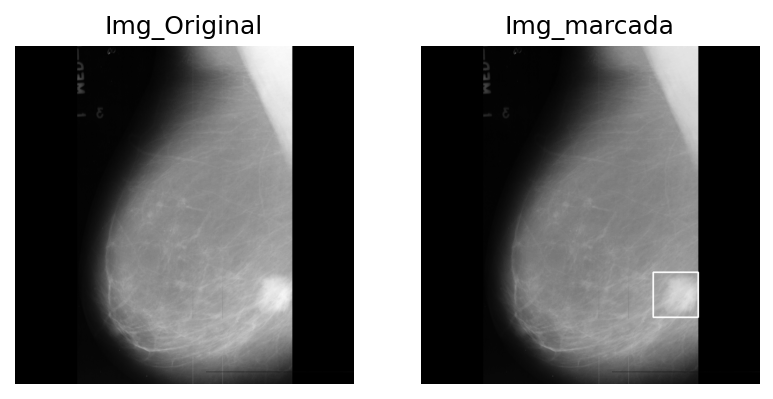

In [ ]:
# Leo la imagen de la mamografia Original
#  MIAS 271
# SPIC Masas espiculadas


img_original = leer_imagen (ruta+'mdb271.pgm')
tamaño_imagen(img_original)

imagen_marcada = dibujar_area_afectada_mias(img_original,769, 270 ,68) # dataset 784, 270 ,68

graficar_dosimagenes_horizontaltitulo(img_original, imagen_marcada,'Img_Original', 'Img_marcada', tamaño=150)

#  Recorto la mamografia

tamaño recorte de la img original: 
dimensiones de la imagen (136, 136)
valor MINIMO del pixel: 149
valor MÁXIMO del pixel: 228
tamaño recorte de la img original después de NORMALIZAR: 


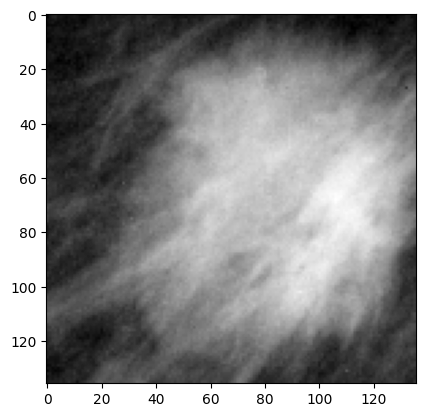

In [ ]:
# Invoco una funcion para CORTAR UNA IMAGEN mamaria

imagen_recorte= recorte_area_afectada_mias(img_original,769, 270 ,68 )  # hago el recorte a la imagen original
print("tamaño recorte de la img original: ")
tamaño_imagen(imagen_recorte)

#Normalizo el recorte de la imagen original

imagen_recorte_norm=(imagen_recorte - imagen_recorte.min()) / (imagen_recorte.max() - imagen_recorte.min())  # normalizo la imagen y la llevo a la escala de 0 a 1
print("tamaño recorte de la img original después de NORMALIZAR: ")
plt.imshow(imagen_recorte_norm, cmap='gray')

In [ ]:
cd '/content/drive/MyDrive'

*  Guardo el recorte son bordes blancos y con dimensiones originales
***

dimensiones de la imagen (136, 136)
valor MINIMO del pixel: 0.0
valor MÁXIMO del pixel: 1.0


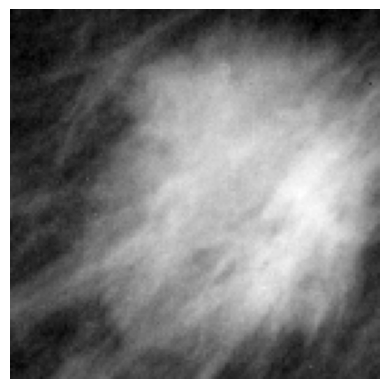

In [ ]:
# GUARDO LA IMAGEN: recorte_img209_gris - Guarda la figura sin ejes y bordes

# Guardar imagen---SIN EJES NI BORDES
plt.imsave('recorte_img209_gris-etiqueta5.png', imagen_recorte_norm, cmap='gray')
tamaño_imagen(imagen_recorte_norm)

# Ocultar ejes y bordes solo para la visualización
plt.axis('off')
plt.imshow(imagen_recorte_norm, cmap='gray')

# APLICO METODODLOGIA:

## 1.2. Triple umbral de OTSU:

 la imagen se segmentó en tres clases según el método de umbral múltiple de Otsu. Se mantuvieron las dos clases más luminosas ya que correspondían a la región mamaria y los demás objetos de la mamografía, mientras que la más oscura correspondía al fondo. La mascara de otsu da 3 valores 0=azul, 1=verde,  2=rojo (donde estan las micro)

# 1.2.1 Filtro potencia

Antes de hacerle Otsu al recorte, le aplico un filtro potencia 4, para que me oscureszca la imagen y elimine puntos blancos que pueden ser falsos positivos

El triple umbral de OTSU es (Nota: empieza en 0 - hasta 1) = [0.16210938 0.43164062]
El triple umbral de OTSU se visualiza con la paleta JET (0=azul, 1=verde, 2=rojo)


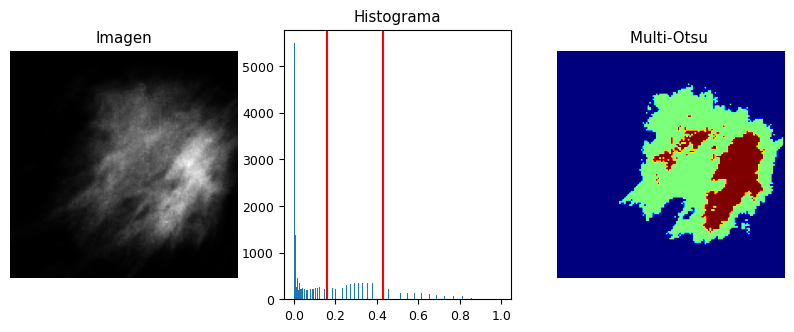

In [ ]:
factor = 4  # selecciono un filtro de potencia 4

imagen_recorte_norm_potencia= imagen_recorte_norm**factor

# Aplico umbral triple de Otsu a la imagen y filtro potencia factor=4
resultados_segmentacion,umbral_multiOtsu = triple_umbral_otsu(imagen_recorte_norm_potencia)

In [ ]:
# Array multiOtsu
print("el umbral MultiOtsu es en el rango de:", umbral_multiOtsu)

umbral_menor, umbral_mayor= umbral_multiOtsu

el umbral MultiOtsu es en el rango de: [0.16210938 0.43164062]


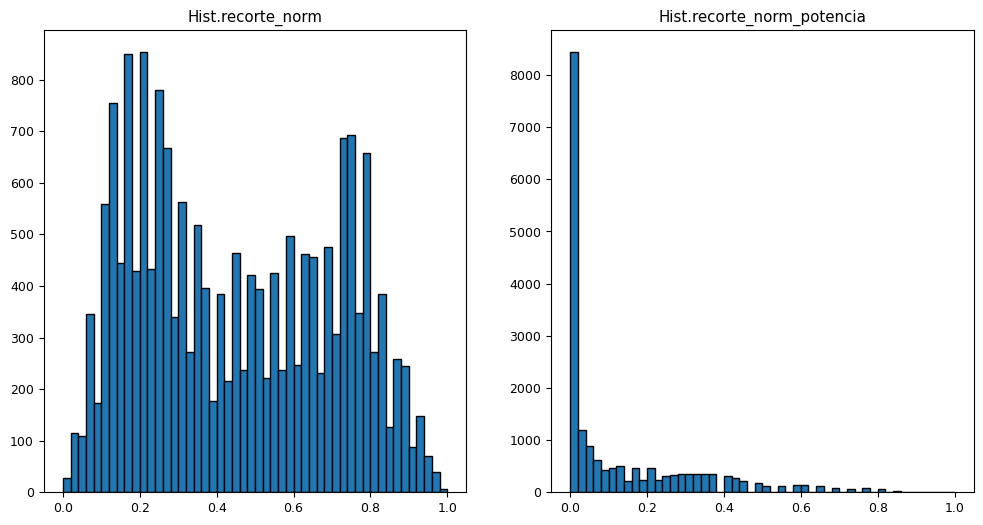

In [ ]:
hyper_histogram(imagen_recorte_norm, imagen_recorte_norm_potencia , 50, title1='Hist.recorte_norm', title2='Hist.recorte_norm_potencia')

In [ ]:
# RESULTADO DEL filtro potencia y TRIPLE UMBRAL DE Otsu

#plt.imshow(resultados_segmentacion)

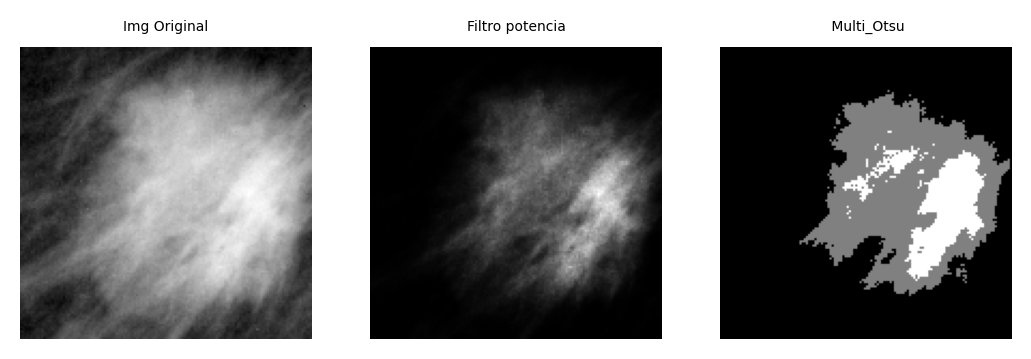

In [ ]:
graficar_tresimagenes_horizontaltitulo(imagen_recorte_norm, imagen_recorte_norm_potencia, resultados_segmentacion,
                                       'Img Original','Filtro potencia', ' Multi_Otsu', tamaño=200)

La imagen resultande de la umbralización de Otsu  la binarizo (la pongo en colores negro y blanco). Los valores menores a 2 los haga fondo (negro=0) y los valores 2 quedan blancos(microcalcificaciones)

## 1.2.1. Generacion de la mascara obtenida  en otsu

pixel valor minimo 0.0
pixel valor maximo 1.0


(136, 136)

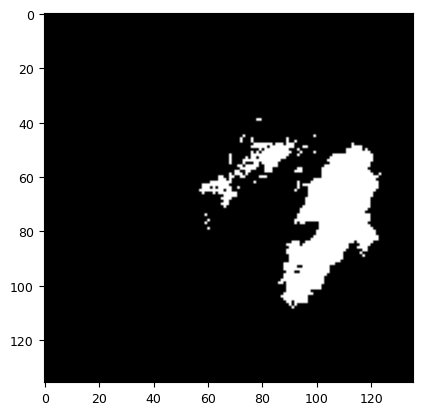

In [ ]:
from typing_extensions import assert_type
import copy

#MASCARA DE OTSU
#plt.imshow(resultados_segmentacion, cmap='gray' )
resultados_segmentacion.shape

# Hago una copia de la imagen  de otsu

resultados_segmentacion_copia1= copy.copy(resultados_segmentacion)

# Aplico el umbral - Modifico el threshold

resultados_segmentacion_copia1[resultados_segmentacion<2 ] = 0  # 2 porq la mascara de otsu da 3 valores 0=azul, 1=verde,  2=rojo (donde estan las micro)
plt.imshow(resultados_segmentacion_copia1, cmap='gray')

# lo normalizo entre 0 y 1 para que me quede en el rango que tiene la mascara segmenteda  manual
resultados_segmentacion_copia1 = resultados_segmentacion_copia1/np.max(resultados_segmentacion_copia1)

#resultados_segmentacion_copia1*=127.5

print("pixel valor minimo",np.min(resultados_segmentacion_copia1))
print("pixel valor maximo",np.max(resultados_segmentacion_copia1))
resultados_segmentacion_copia1.shape

# CLASES SEGÚN LUMINANCIAS DE PÍXELES: - fondo, piel, microcalcificaciones

Se usaran los umbrales del MultiOtsu: 0.162109375 0.431640625

Tabla de resultados:
  Categoría  Cantidad de píxeles  Porcentaje de píxeles  Valor medio  \
0   Clase 1                13007              70.323313     0.029807   
1   Clase 2                 4123              22.291306     0.297735   
2   Clase 3                 1366               7.385381     0.598135   

   Desviación estándar  
0             0.043434  
1             0.076290  
2             0.118329  


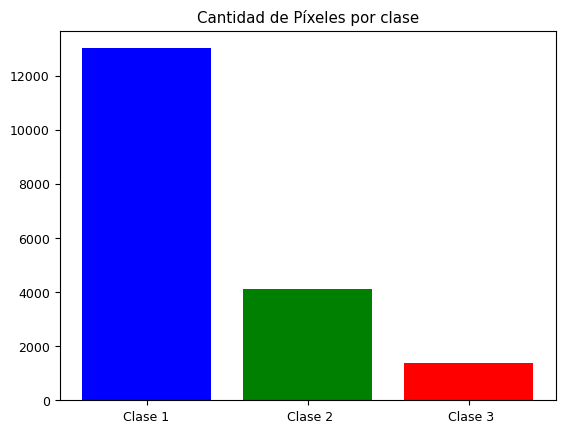

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que imagen_recorte_norm_potencia ya ha sido definido y tiene valores válidos

# Umbralización basada en los valores dados
imagen_umbralizada = np.zeros_like(imagen_recorte_norm_potencia)

# Definimos los umbrales (umbral_menor y umbral_mayor fueron obtenidos en el multiOtsu)
umbral_1 = umbral_menor
umbral_2 = umbral_mayor
print("Se usaran los umbrales del MultiOtsu:",umbral_1 ,umbral_2)

# Aplicamos la umbralización
imagen_umbralizada[imagen_recorte_norm_potencia <= umbral_1] = 0
imagen_umbralizada[(imagen_recorte_norm_potencia > umbral_1) & (imagen_recorte_norm_potencia <= umbral_2)] = 1
imagen_umbralizada[imagen_recorte_norm_potencia > umbral_2] = 2

# Contamos los píxeles en cada categoría
contador_menores = np.count_nonzero(imagen_umbralizada == 0)
contador_entre = np.count_nonzero(imagen_umbralizada == 1)
contador_mayores = np.count_nonzero(imagen_umbralizada == 2)

# Calculamos el porcentaje de píxeles por categoría
total_pixeles = np.prod(imagen_umbralizada.shape)
porcentaje_menores = (contador_menores / total_pixeles) * 100
porcentaje_entre = (contador_entre / total_pixeles) * 100
porcentaje_mayores = (contador_mayores / total_pixeles) * 100

# Calculamos el valor medio y la desviación estándar por categoría
valor_medio_menores = np.mean(imagen_recorte_norm_potencia[imagen_umbralizada == 0])
valor_medio_entre = np.mean(imagen_recorte_norm_potencia[imagen_umbralizada == 1])
valor_medio_mayores = np.mean(imagen_recorte_norm_potencia[imagen_umbralizada == 2])

desviacion_estandar_menores = np.std(imagen_recorte_norm_potencia[imagen_umbralizada == 0])
desviacion_estandar_entre = np.std(imagen_recorte_norm_potencia[imagen_umbralizada == 1])
desviacion_estandar_mayores = np.std(imagen_recorte_norm_potencia[imagen_umbralizada == 2])

# Crear DataFrame para tabla
data = {
    'Categoría': ['Clase 1', ' Clase 2', ' Clase 3'],
    'Cantidad de píxeles': [contador_menores, contador_entre, contador_mayores],
    'Porcentaje de píxeles': [porcentaje_menores, porcentaje_entre, porcentaje_mayores],
    'Valor medio': [valor_medio_menores, valor_medio_entre, valor_medio_mayores],
    'Desviación estándar': [desviacion_estandar_menores, desviacion_estandar_entre, desviacion_estandar_mayores]
}
df = pd.DataFrame(data)

# Imprimir tabla
print("\nTabla de resultados:")
print(df)

# Crear gráfico de barras
plt.bar(df['Categoría'], df['Cantidad de píxeles'], color=['blue', 'green', 'red'])
plt.title('Cantidad de Píxeles por clase')
plt.xlabel('')
plt.ylabel('')
plt.show()


## 1.2.3. Filtrado morfologico a la mascara de otsu: por apertura

se le realiza el filtrado de apertura a la mascara obtenida en otsu, en esta mascara solo se ve el seno delimitado

tamaño de la imagen: (136, 136)
pixel máx 1
pixel min 0


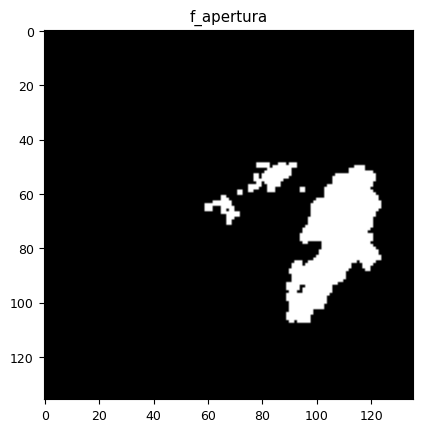

In [ ]:
img_apertura= filto_apertura(resultados_segmentacion_copia1)  # con Kernel de 3*3
graficar_imagen(img_apertura , 'f_apertura', tamaño=100)
print('tamaño de la imagen:', img_apertura.shape)
print('pixel máx', np.max(img_apertura))
print('pixel min', np.min(img_apertura))


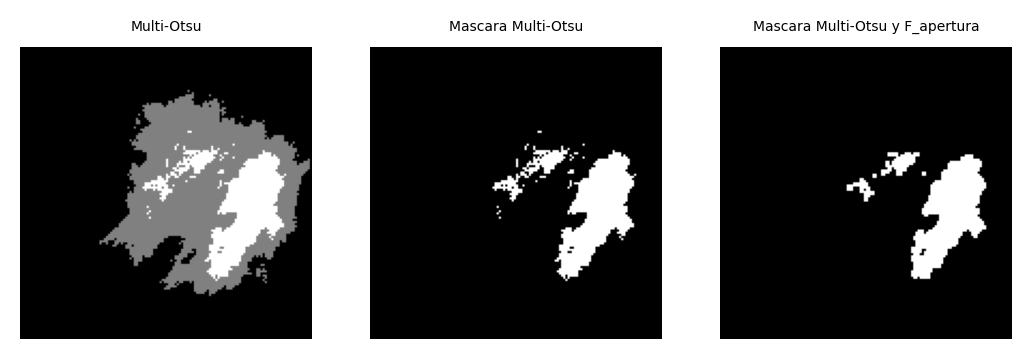

In [ ]:
graficar_tresimagenes_horizontaltitulo(resultados_segmentacion,resultados_segmentacion_copia1,img_apertura, 'Multi-Otsu',
                                       'Mascara Multi-Otsu','Mascara Multi-Otsu y F_apertura', tamaño=200)

## 1.3. Convolucion entre la mascara de otsu y la imagen original

dimensiones de la imagen (136, 136)
valor MINIMO del pixel: 0.0
valor MÁXIMO del pixel: 1.0


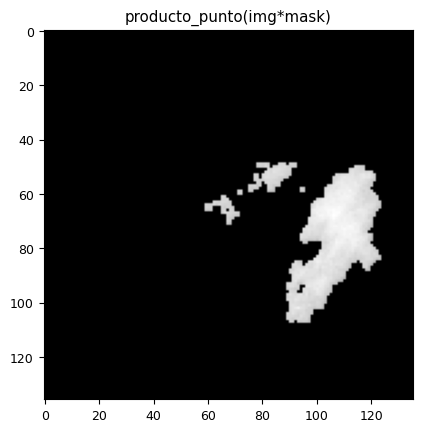

In [ ]:
#PRODUCTO PUNTO ENTRE LA IMAGEN ORIGINAL RECORTADA Y NORMALIZADA * CON LA MASCARA OBTENIDA EN LA BINARIZACIÓN DE OTSU+f. Apertura

producto= imagen_recorte_norm*img_apertura
graficar_imagen(producto , 'producto_punto(img*mask)', tamaño=100)
tamaño_imagen(producto)

## 2.1.Función de Anscombe

Ajustar el rango según el tamaño del pixel max y min de la imágen!!!:
dimensiones de la imagen (136, 136)
valor MINIMO del pixel: 1.224744871391589
valor MÁXIMO del pixel: 2.345207879911715


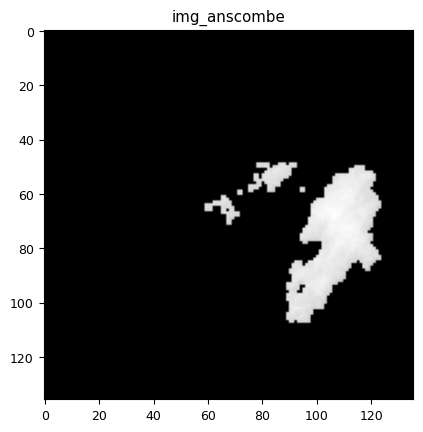

In [ ]:
# APLICO LA FUNCIÓN DE ANSCOMBE

img_anscombe= anscombe(producto)
graficar_imagen(img_anscombe , 'img_anscombe', tamaño=100)


## 2.2.  transformaciones de intensidad mediante la función coseno

Ajustar el rango según el tamaño del pixel max y min de la imágen!!!:
dimensiones de la imagen (136, 136)
valor MINIMO del pixel: 2.8458931914276953e-05
valor MÁXIMO del pixel: 0.00010434809716375337


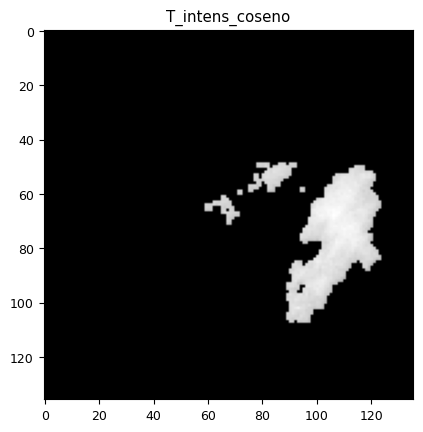

In [ ]:
# APLICO LA FUNCION DE TRANSFORMACIÍN DE INTENSIDAD MEDIANTE FUNCIÓN COSENO

img_coseno= funcion_intesidad_coseno(img_anscombe)
graficar_imagen(img_coseno, 'T_intens_coseno', tamaño=100)
#graficar_dosimagenes_horizontaltitulo( img_limpia,img_coseno, "limpia", "coseno", tamaño=100)

## 2.3. Filtro DOG

dimensiones de la imagen (136, 136)
valor MINIMO del pixel: -3.0889218938039663e-06
valor MÁXIMO del pixel: 3.014118196998191e-05
******************************************************
tamaño recorte de la img original después de NORMALIZAR: 
dimensiones de la imagen (136, 136)
valor MINIMO del pixel: 0.0
valor MÁXIMO del pixel: 1.0


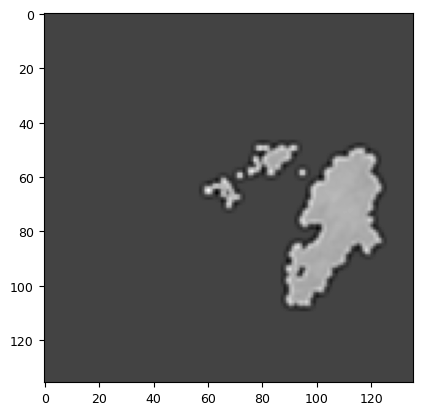

In [ ]:
# APLICO EL FILTRO DOG

img_dog1 = filtro_dog(img_coseno, k1=1.1, k2=0.9)
#graficar_imagen(img_dog1, 'F_DOG', tamaño=100)
tamaño_imagen(img_dog1)
#plt.imshow(img_dog1, cmap='gray')
print('******************************************************')
#Normalizo la imagen DOG

img_dog1_norm=(img_dog1 - img_dog1.min()) / (img_dog1.max() - img_dog1.min())  # normalizo la imagen y la llevo a la escala de 0 a 1
print("tamaño recorte de la img original después de NORMALIZAR: ")
tamaño_imagen(img_dog1_norm)
plt.imshow(img_dog1_norm, cmap='gray')

IMAGEN  RESULTANTE, FINAL DE LA METODOLOGÍA

dimensiones de la imagen (136, 136)
valor MINIMO del pixel: 0.0
valor MÁXIMO del pixel: 0.8227848101265823
******************************************************
tamaño recorte de la img original después de NORMALIZAR: 
dimensiones de la imagen (136, 136)
valor MINIMO del pixel: 0.0
valor MÁXIMO del pixel: 1.0


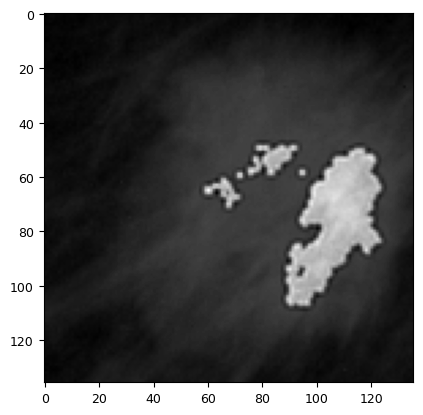

In [ ]:
img_final_metodologia= img_dog1_norm*imagen_recorte_norm
tamaño_imagen(img_final_metodologia)
#graficar_imagen(img_final_metodologia, 'Img_final', tamaño=100)

print('******************************************************')
#Normalizo la imagen Final

img_final_metodologia_norm =(img_final_metodologia- img_final_metodologia.min()) / (img_final_metodologia.max() - img_final_metodologia.min())  # normalizo la imagen y la llevo a la escala de 0 a 1
print("tamaño recorte de la img original después de NORMALIZAR: ")
tamaño_imagen(img_final_metodologia_norm)
plt.imshow(img_final_metodologia_norm, cmap='gray')

#  IMAGENES IMPORTANTES EN LA METODOLOGÍA DE SEGMENTACIÓN AUTOMÁTICA

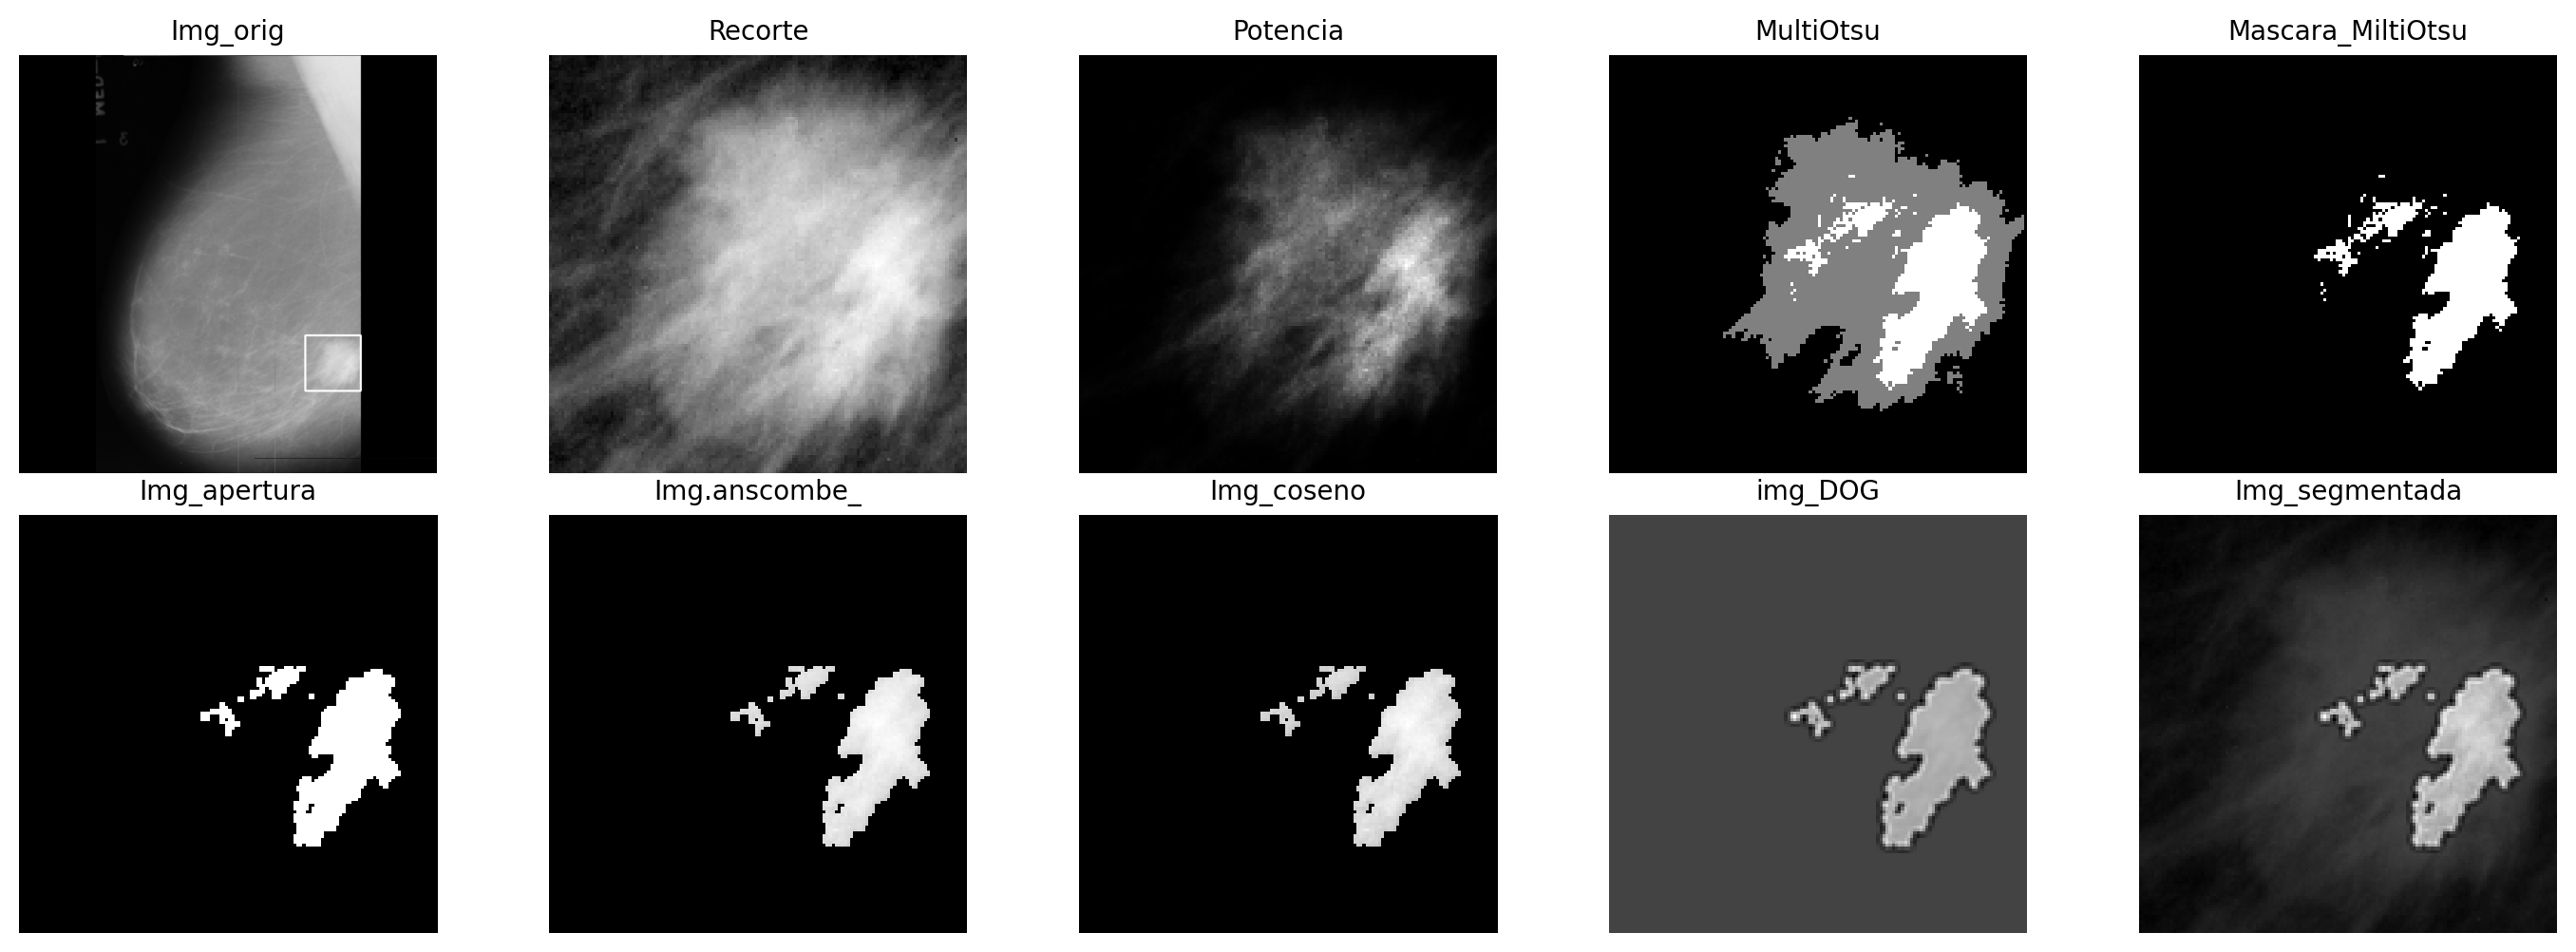

In [ ]:
graficar_diezimagenes_horizontaltitulo(imagen_marcada ,imagen_recorte_norm, imagen_recorte_norm_potencia, resultados_segmentacion,
                                       resultados_segmentacion_copia1, img_apertura, img_anscombe, img_coseno,  img_dog1, img_final_metodologia_norm,
                                       'Img_orig','Recorte','Potencia','MultiOtsu','Mascara_MiltiOtsu','Img_apertura','Img.anscombe_',
                                       'Img_coseno','img_DOG','Img_segmentada')

# Preparo la imagen para ingresar a la dim fractal

OTSU SIMPLE A IMG DOG NORMALIZADA

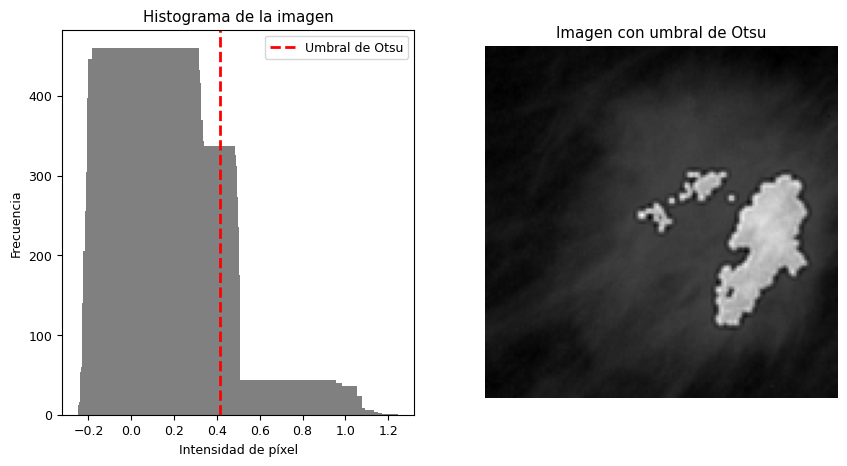

EL UMBRAL DE OTSU ES: 0.416015625


In [ ]:
# Aplico la función para encontrar el Umbral de Otsu  en imagenes normaizadas entre 0 y 1. Después grafico

umbral_otsu = Otsu(img_final_metodologia_norm)
print("EL UMBRAL DE OTSU ES:",umbral_otsu)

* BINARIZO - img que ingresa  a dim fractal

(136, 136)
pixel minimo: 1.0
pixel máximo: 0.0


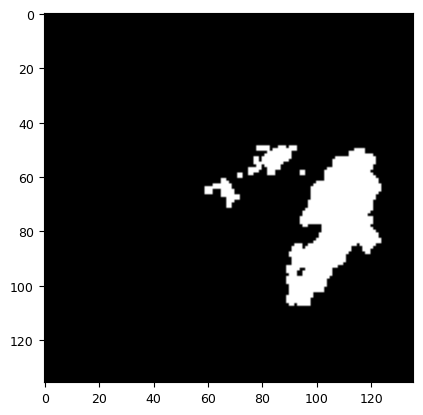

In [ ]:
img_binarizada= binarizacion(img_final_metodologia_norm, umbral_otsu)
plt.imshow(img_binarizada, cmap='gray')

# PROCESO PARA DIMENSION FRACTAL

In [ ]:
# Uso las funciones que estan en. 5.VIEWPORT CUADRADO Y PUNTOS MONTECARLO

# Invoco:  def viewport_cuadrado(img, beta):
view_cuadrado = viewport_cuadrado(img_binarizada, beta=5)

# Invoco: def generar_circulo(img):
circulo = generar_circulo(view_cuadrado)


# Invoco: def generar_puntos_montecarlo(img, num_puntos=50):
puntos_montecarlo = generar_puntos_montecarlo(view_cuadrado, num_puntos=100) #*****////////////aqui cambio el nro de puntos

# Verifico que haya puntos generados, no esten en la frontera y se puedan dibujar dentro del circulo sin que qeude algo por fuera
if puntos_montecarlo:
    x_dentro, y_dentro = zip(*puntos_montecarlo)
    x_val_list = []
    y_val_list = []
    for punto in range(len(x_dentro)):
      # Invoco: def verificar_im_en_circulo(x, y, im, viewport):
      # Verifico que los puntos se puedan dibujar y no esten en la frontera del circulo montecarlo
      # Se evaluan los 4 puntos de la imagen
      x_val, y_val = verificar_im_en_circulo(x_dentro[punto], y_dentro[punto], img_binarizada, view_cuadrado)
      if x_val:
        x_val_list.append(x_val)
        y_val_list.append(y_val)

    print('Número total de puntos que cumplen la condición MONTECARLO: ', len(x_dentro))
    print("*************************************")
    # Puntos que no estan en la frontera del circulo MOntecarlo y SI se pueden dibujar
    print('Número de puntos que cumplen MONTECARLO y SI se pueden dibujar: ', len(x_val_list))
    print("puntos a dibujar en x:", x_val_list )
    print("puntos a dibujar en y:", y_val_list )
    print("*************************************")


--------------------------------------
Dimensiones de la imagen de entrada a la función - viewport cuadrado-: (136, 136)
--------------------------------------
Se tomará el lado mas grande de la imagen de entrada, para formar el cuadrado: 136
--------------------------------------
El factor de incremento de la iamgen sera un factor Beta:  5
--------------------------------------
Dimensiones del viewport: (680, 680)
--------------------------------------
++++++++++++++++++++++++++++++++++++++
El radio del circulo dibujado es: 340.0
++++++++++++++++++++++++++++++++++++++
El total de puntos aleatorios a evaluar es:  100
.....................................
los puntos que cumplen la condición de montecarlo sin importar la frontera: [(511.3546400813267, 315.62777469786545), (279.8751354635988, 133.83376329813916), (618.3445638174586, 445.6353556889232), (303.90018136566454, 529.5286076866008), (573.6232542122699, 186.07432537012394), (74.09199581876956, 477.72281005867956), (464.0748549808

## Visualizar viewport, putos y la imagen en todas las posiciones validas

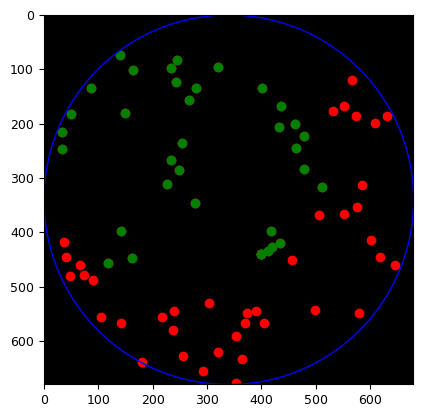

In [ ]:

plt.imshow(view_cuadrado, cmap='gray')  # Usa cmap='gray' si la imagen es en blanco y negro
plt.scatter(x_dentro, y_dentro, color='red')
plt.scatter(x_val_list, y_val_list, color='green')
plt.gca().add_artist(circulo)


In [ ]:
"""
for puntos in range(len(x_val_list)):
  x_d, y_d = int(x_val_list[puntos]), int(y_val_list[puntos])
  y_im, x_im = img_binarizada.shape
  view_cuadrado[y_d:y_d+y_im, x_d:x_d+x_im] = img_binarizada
  plt.imshow(view_cuadrado, cmap='gray')  # Usa cmap='gray' si la imagen es en blanco y negro
  #plt.scatter(x_dentro, y_dentro, color='red')
  plt.scatter(x_val_list, y_val_list, color='green')
  plt.gca().add_artist(circulo)
"""

"\nfor puntos in range(len(x_val_list)):\n  x_d, y_d = int(x_val_list[puntos]), int(y_val_list[puntos])\n  y_im, x_im = img_binarizada.shape\n  view_cuadrado[y_d:y_d+y_im, x_d:x_d+x_im] = img_binarizada\n  plt.imshow(view_cuadrado, cmap='gray')  # Usa cmap='gray' si la imagen es en blanco y negro\n  #plt.scatter(x_dentro, y_dentro, color='red')\n  plt.scatter(x_val_list, y_val_list, color='green')\n  plt.gca().add_artist(circulo)\n"

*  Invoco la función  Box counting

In [ ]:
# **************************** Box counting ***********************************************

# Invoco la función: def box_counting2(img, viewport, x_val, y_val)
# viewport debe ser cuadrado

boxes, count= box_counting2(img_binarizada, view_cuadrado, int(x_val), int(y_val))
boxes

array([-0.69314718, -1.38629436, -2.07944154, -2.77258872, -3.4657359 ,
       -4.15888308, -4.85203026, -5.54517744, -6.23832463])

In [ ]:
# INVOCO LA FUNCION BOX COUNTING NUEVA

# Inicializar listas para almacenar los resultados
lista_log_inv_boxes_X=[]
lista_log_counts_y= []

# Recorrer cada par de coordenadas y obtener los resultados
for x_val, y_val in zip(x_val_list, y_val_list):
  log_inv_boxes_X, log_counts_y = box_counting2(img_binarizada, view_cuadrado, int(x_val), int(y_val))
  lista_log_inv_boxes_X.append(log_inv_boxes_X)
  lista_log_counts_y.append(log_counts_y)

In [ ]:
# Convertir lista_log_counts_y en una matriz de numpy
# Aqui estan las cuentas de cuantos pixeles hay en cada (1/boxes)

matriz_log_counts_y = np.array(lista_log_counts_y)
print("Tamaño de matriz_log_counts_y, es:",matriz_log_counts_y.shape)
print(matriz_log_counts_y)

#convierto x_val_list en un vector
vector_x_val_list= np.array(x_val_list)
#print("Tamaño del vector_x_val_list, es:",vector_x_val_list.shape) # (24,),significa un arreglo unidimensional con 24 elementos.1 fila,24 columnas
print("Tamaño del vector_x_val_list, es:",len(x_val_list))
num_puntos=len(x_val_list)
#print(vector_x_val_list)

#convierto y_val_list en un vector
vector_y_val_list= np.array(y_val_list)
print("Tamaño del vector_y_val_list, es:",vector_y_val_list.shape) # (24,),significa un arreglo unidimensional con 24 elemrntos
#print(vector_y_val_list)

Tamaño de matriz_log_counts_y, es: (35, 9)
[[5.24174702 4.82831374 4.20469262 3.4657359  2.7080502  1.94591015
  1.79175947 1.60943791 1.09861229]
 [5.63121178 5.27811466 4.66343909 3.8501476  3.09104245 2.39789527
  2.07944154 1.79175947 1.09861229]
 [5.92692603 5.53338949 4.8978398  4.09434456 3.29583687 2.56494936
  2.07944154 1.79175947 1.09861229]
 [6.09356977 5.66296048 5.01063529 4.26267988 3.4339872  2.7080502
  2.07944154 1.79175947 1.09861229]
 [6.3044488  5.88887796 5.22574667 4.44265126 3.58351894 2.94443898
  2.39789527 1.94591015 1.38629436]
 [6.47850964 6.06145692 5.3981627  4.59511985 3.76120012 3.04452244
  2.48490665 2.07944154 1.38629436]
 [6.36130248 5.95064255 5.28826703 4.51085951 3.68887945 2.94443898
  2.48490665 2.07944154 1.38629436]
 [6.53958596 6.13556489 5.45532112 4.66343909 3.8501476  3.09104245
  2.56494936 2.07944154 1.38629436]
 [6.56244409 6.15697899 5.48479693 4.7095302  3.91202301 3.17805383
  2.63905733 2.19722458 1.38629436]
 [6.68336095 6.2822667

In [ ]:
# llevamos los vecores: vector_x_val_list(20), vector_y_val_list(20), a las mismas dimensiones de la matriz matriz_log_counts_y ((20, 12))
# como vector_x_val_list, tiene 20 filas y vector_y_val_list,  tiene 20 filas, los paso a vectores columnna, para que queden con la misma dimension de la matriz
#luego concatenar por columnas para construir la tablas

# Transformar en un vector columna con 20 filas y 1 columna
vector_x_val_list_columna = vector_x_val_list.reshape(num_puntos, 1)
print("Tamaño del vector_x_val_list, es:",vector_x_val_list_columna.shape)

#convierto y_val_list en un vector
#vector_y_val_list= np.array(y_val_list)
vector_y_val_list_columna = vector_x_val_list.reshape(num_puntos, 1)
print("Tamaño del vector_y_val_list, es:", vector_y_val_list_columna.shape)


Tamaño del vector_x_val_list, es: (35, 1)
Tamaño del vector_y_val_list, es: (35, 1)


In [ ]:
# Ahora concatenamos: vector_x_val_list_columna + vector_y_val_list_columna + matriz_log_counts_y. Para formar la tabla

tabla = np.concatenate((vector_x_val_list_columna, vector_y_val_list_columna, matriz_log_counts_y), axis=1)

print("El tamaño de la tabla es: ",tabla.shape)
tabla

El tamaño de la tabla es:  (35, 11)


array([[511.35464008, 511.35464008,   5.24174702,   4.82831374,
          4.20469262,   3.4657359 ,   2.7080502 ,   1.94591015,
          1.79175947,   1.60943791,   1.09861229],
       [279.87513546, 279.87513546,   5.63121178,   5.27811466,
          4.66343909,   3.8501476 ,   3.09104245,   2.39789527,
          2.07944154,   1.79175947,   1.09861229],
       [464.07485498, 464.07485498,   5.92692603,   5.53338949,
          4.8978398 ,   4.09434456,   3.29583687,   2.56494936,
          2.07944154,   1.79175947,   1.09861229],
       [243.25565669, 243.25565669,   6.09356977,   5.66296048,
          5.01063529,   4.26267988,   3.4339872 ,   2.7080502 ,
          2.07944154,   1.79175947,   1.09861229],
       [411.41654048, 411.41654048,   6.3044488 ,   5.88887796,
          5.22574667,   4.44265126,   3.58351894,   2.94443898,
          2.39789527,   1.94591015,   1.38629436],
       [163.12879272, 163.12879272,   6.47850964,   6.06145692,
          5.3981627 ,   4.59511985,   3.7

In [ ]:
#df=pd.DataFrame(tabla, columns=["x","y","box2","box4","box8","box16" , "box32","box64","box128","box256","box512","box1024","box2048","box4096"])
df=pd.DataFrame(tabla, columns=["x","y","box1","box2","box3","box4" , "box5","box6","box17","box256","box512"])
#df = pd.DataFrame(tabla)
df.head(100)

,x,y,box1,box2,box3,box4,box5,box6,box17,box256,box512
0,511.354640,511.354640,5.241747,4.828314,4.204693,3.465736,2.708050,1.945910,1.791759,1.609438,1.098612
1,279.875135,279.875135,5.631212,5.278115,4.663439,3.850148,3.091042,2.397895,2.079442,1.791759,1.098612
2,464.074855,464.074855,5.926926,5.533389,4.897840,4.094345,3.295837,2.564949,2.079442,1.791759,1.098612
3,243.255657,243.255657,6.093570,5.662960,5.010635,4.262680,3.433987,2.708050,2.079442,1.791759,1.098612
4,411.416540,411.416540,6.304449,5.888878,5.225747,4.442651,3.583519,2.944439,2.397895,1.945910,1.386294
5,163.128793,163.128793,6.478510,6.061457,5.398163,4.595120,3.761200,3.044522,2.484907,2.079442,1.386294
6,243.898204,243.898204,6.361302,5.950643,5.288267,4.510860,3.688879,2.944439,2.484907,2.079442,1.386294
7,248.309472,248.309472,6.539586,6.135565,5.455321,4.663439,3.850148,3.091042,2.564949,2.079442,1.386294
8,462.142544,462.142544,6.562444,6.156979,5.484797,4.709530,3.912023,3.178054,2.639057,2.197225,1.386294
9,400.639479,400.639479,6.683361,6.282267,5.594711,4.812184,4.043051,3.295837,2.639057,2.197225,1.386294


In [ ]:
# paso 1 - cuaderno
# El vector boxes_matriz lo convierto en una matriz, para lo cual lo multiplico por  una matriz de unos

matrix_ones=np.ones((matriz_log_counts_y.shape))
print("Tamaño de matrix_ones, es:",matrix_ones.shape)
print(matrix_ones)

Tamaño de matrix_ones, es: (35, 9)
[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 

In [ ]:
# paso 1 - cuaderno
# Visualicemos el vecto inicial de boxes

boxes
print(boxes)

[-0.69314718 -1.38629436 -2.07944154 -2.77258872 -3.4657359  -4.15888308
 -4.85203026 -5.54517744 -6.23832463]


In [ ]:
# paso 1 - cuaderno
# El vector boxes_matriz lo convierto en una matriz, para lo cual lo multiplico por  una matriz de unos
# Hago el prouducto entre el vector de boxes y la matriz de unos

boxesboxes_matriz= boxes * matrix_ones
print("Tamaño de boxesboxes_matriz, es:",boxesboxes_matriz.shape)
print(boxesboxes_matriz)

Tamaño de boxesboxes_matriz, es: (35, 9)
[[-0.69314718 -1.38629436 -2.07944154 -2.77258872 -3.4657359  -4.15888308
  -4.85203026 -5.54517744 -6.23832463]
 [-0.69314718 -1.38629436 -2.07944154 -2.77258872 -3.4657359  -4.15888308
  -4.85203026 -5.54517744 -6.23832463]
 [-0.69314718 -1.38629436 -2.07944154 -2.77258872 -3.4657359  -4.15888308
  -4.85203026 -5.54517744 -6.23832463]
 [-0.69314718 -1.38629436 -2.07944154 -2.77258872 -3.4657359  -4.15888308
  -4.85203026 -5.54517744 -6.23832463]
 [-0.69314718 -1.38629436 -2.07944154 -2.77258872 -3.4657359  -4.15888308
  -4.85203026 -5.54517744 -6.23832463]
 [-0.69314718 -1.38629436 -2.07944154 -2.77258872 -3.4657359  -4.15888308
  -4.85203026 -5.54517744 -6.23832463]
 [-0.69314718 -1.38629436 -2.07944154 -2.77258872 -3.4657359  -4.15888308
  -4.85203026 -5.54517744 -6.23832463]
 [-0.69314718 -1.38629436 -2.07944154 -2.77258872 -3.4657359  -4.15888308
  -4.85203026 -5.54517744 -6.23832463]
 [-0.69314718 -1.38629436 -2.07944154 -2.77258872 -3.46

In [ ]:
# paso 2 - cuaderno
# Hago la transpuesta de boxesboxes_matriz

boxesboxes_matriz_transpuesta=boxesboxes_matriz.T
print("Tamaño de boxesboxes_matriz_transpuesta, es:",boxesboxes_matriz_transpuesta.shape)
print(boxesboxes_matriz_transpuesta)

Tamaño de boxesboxes_matriz_transpuesta, es: (9, 35)
[[-0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
  -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
  -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
  -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
  -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
  -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718]
 [-1.38629436 -1.38629436 -1.38629436 -1.38629436 -1.38629436 -1.38629436
  -1.38629436 -1.38629436 -1.38629436 -1.38629436 -1.38629436 -1.38629436
  -1.38629436 -1.38629436 -1.38629436 -1.38629436 -1.38629436 -1.38629436
  -1.38629436 -1.38629436 -1.38629436 -1.38629436 -1.38629436 -1.38629436
  -1.38629436 -1.38629436 -1.38629436 -1.38629436 -1.38629436 -1.38629436
  -1.38629436 -1.38629436 -1.38629436 -1.38629436 -1.38629436]
 [-2.07944154 -2.07944154 -2.07944154 -2.07944154 -2.07944154 -2.07944154
  -2.07

In [ ]:
# paso 2 - cuaderno
# Hago la transpuesta de matriz_log_counts_y

matriz_log_counts_y_transpuesta=matriz_log_counts_y.T
print("Tamaño de matriz_log_counts_y_transpuesta, es:",matriz_log_counts_y_transpuesta.shape)
print(matriz_log_counts_y_transpuesta)


Tamaño de matriz_log_counts_y_transpuesta, es: (9, 35)
[[5.24174702 5.63121178 5.92692603 6.09356977 6.3044488  6.47850964
  6.36130248 6.53958596 6.56244409 6.68336095 6.77193556 6.76388491
  6.8721281  6.93244789 6.88857246 6.86171134 6.95177216 7.00306546
  7.02375895 7.03966035 7.05358573 7.04925484 7.08254857 7.0808679
  7.09174212 7.03966035 7.09589322 7.1172055  7.06731985 7.07918439
  7.08170859 7.05272105 7.1180162  7.16084591 7.08506429]
 [4.82831374 5.27811466 5.53338949 5.66296048 5.88887796 6.06145692
  5.95064255 6.13556489 6.15697899 6.28226675 6.3952616  6.40687999
  6.51025834 6.57368017 6.5366916  6.52795792 6.61873898 6.68586095
  6.70441435 6.70196037 6.70686234 6.69208374 6.7262334  6.72503364
  6.7546041  6.70441435 6.75576892 6.77308038 6.72383244 6.72862861
  6.70930434 6.6821086  6.74288064 6.77422389 6.67834211]
 [4.20469262 4.66343909 4.8978398  5.01063529 5.22574667 5.3981627
  5.28826703 5.45532112 5.48479693 5.59471138 5.70044357 5.71373281
  5.82008293 5.

In [ ]:
# paso 3 - cuaderno
# Hago reshape a matriz_log_counts_y_transpuesta y boxesboxes_matriz_transpuesta para que queden en una sola columna
# Reorganizar la matriz matriz_log_counts_y_transpuesta a una forma de 12 filas y 1 columna


# Reorganizar la matriz a una sola columna
matriz_log_counts_y_transpuesta_reshape = matriz_log_counts_y_transpuesta.reshape(-1, 1)

# Imprimir el tamaño de la nueva matriz
print("Tamaño de matriz_log_counts_y_reshape:", matriz_log_counts_y_transpuesta_reshape.shape)

# Imprimir la nueva matriz reorganizada
print(matriz_log_counts_y_transpuesta_reshape)

Tamaño de matriz_log_counts_y_reshape: (315, 1)
[[5.24174702]
 [5.63121178]
 [5.92692603]
 [6.09356977]
 [6.3044488 ]
 [6.47850964]
 [6.36130248]
 [6.53958596]
 [6.56244409]
 [6.68336095]
 [6.77193556]
 [6.76388491]
 [6.8721281 ]
 [6.93244789]
 [6.88857246]
 [6.86171134]
 [6.95177216]
 [7.00306546]
 [7.02375895]
 [7.03966035]
 [7.05358573]
 [7.04925484]
 [7.08254857]
 [7.0808679 ]
 [7.09174212]
 [7.03966035]
 [7.09589322]
 [7.1172055 ]
 [7.06731985]
 [7.07918439]
 [7.08170859]
 [7.05272105]
 [7.1180162 ]
 [7.16084591]
 [7.08506429]
 [4.82831374]
 [5.27811466]
 [5.53338949]
 [5.66296048]
 [5.88887796]
 [6.06145692]
 [5.95064255]
 [6.13556489]
 [6.15697899]
 [6.28226675]
 [6.3952616 ]
 [6.40687999]
 [6.51025834]
 [6.57368017]
 [6.5366916 ]
 [6.52795792]
 [6.61873898]
 [6.68586095]
 [6.70441435]
 [6.70196037]
 [6.70686234]
 [6.69208374]
 [6.7262334 ]
 [6.72503364]
 [6.7546041 ]
 [6.70441435]
 [6.75576892]
 [6.77308038]
 [6.72383244]
 [6.72862861]
 [6.70930434]
 [6.6821086 ]
 [6.74288064]


In [ ]:
# paso 3 - cuaderno
# Hago reshape a matriz_log_counts_y_transpuesta y boxesboxes_matriz_transpuesta para que queden en una sola columna
# Reorganizar la matriz matriz_log_counts_y_transpuesta a una forma de 12 filas y 1 columna


# Reorganizar la matriz a una sola columna
boxesboxes_matriz_transpuesta_reshape = boxesboxes_matriz_transpuesta.reshape(-1, 1)
print("Tamaño de boxesboxes_matriz_transpuesta_reshape:", boxesboxes_matriz_transpuesta_reshape.shape)
print(boxesboxes_matriz_transpuesta_reshape)

Tamaño de boxesboxes_matriz_transpuesta_reshape: (315, 1)
[[-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.38629436]
 [-1.3862943

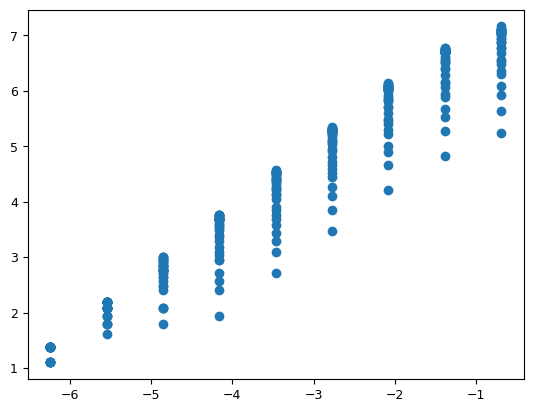

In [ ]:
# Grafiicar  boxesboxes_matriz_transpuesta_reshape vs. matriz_log_counts_y_transpuesta_reshape

plt.scatter(boxesboxes_matriz_transpuesta_reshape, matriz_log_counts_y_transpuesta_reshape)

la dimensión fractal de la mamografia es: 1.020173423687967
Slope: 1.020173423687967
Intercept: 7.711552375872909
R-squared: 0.9528281574865325
P-value: 1.2462636943956672e-209
Standard error: 0.012830275014023658


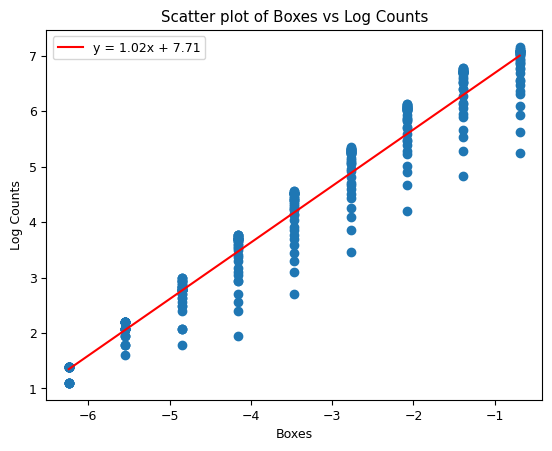

In [ ]:

# Asegurarse de que las matrices están en la forma correcta
boxesboxes_matriz_transpuesta_reshape = boxesboxes_matriz_transpuesta_reshape.reshape(-1)
matriz_log_counts_y_transpuesta_reshape = matriz_log_counts_y_transpuesta_reshape.reshape(-1)

# Verificar que ambas matrices tienen el mismo tamaño
assert boxesboxes_matriz_transpuesta_reshape.shape == matriz_log_counts_y_transpuesta_reshape.shape, "Las matrices deben tener el mismo tamaño"

# Graficar scatter plot
plt.scatter(boxesboxes_matriz_transpuesta_reshape, matriz_log_counts_y_transpuesta_reshape)
plt.xlabel('Boxes')
plt.ylabel('Log Counts')
plt.title('Scatter plot of Boxes vs Log Counts')

# Calcular la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(boxesboxes_matriz_transpuesta_reshape, matriz_log_counts_y_transpuesta_reshape)
print("la dimensión fractal de la mamografia es:",slope)
# Imprimir los resultados de la regresión lineal
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard error:", std_err)

# Graficar la línea de regresión
x = np.linspace(min(boxesboxes_matriz_transpuesta_reshape), max(boxesboxes_matriz_transpuesta_reshape), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.legend()
plt.show()